# Working with rasters

This is the notebook to start with in this repository.  After this notebook move on to any of the notebooks in this folder.

### Table of Contents
* 🧠Anatomy of a raster
* 📖Opening a file
* 🔍Inspecting the metadata
* 🚜Working with the data
* 💾Saving a file

### Installing and Importing Packages

In [ ]:
!pip install rasterio numpy scipy -q

In [2]:
# These are all the imports that are used in this notebook
# Each import is also present a second time, right before the library is used for the first time
import rasterio
import numpy as np
from scipy import stats
import rasterio.plot as rplot
from pprint import pprint
import os

## 🧠 The Anatomy of a raster

Working with raster data involves understanding how rasters are organized.

<img src="../images/Raster Anatomy.jpg" width="550">

## 📖 Opening a file

When you open data files in Python you usually need to use a library.  When dealing with raster data there are several common libraries, most of which cater to a specific data type:

  
|  File Format |  File Extension | Python Library  |
|---|---|---|
|  netCDF |  `.nc` | netCDF4  |
|  HDF5 | `.hdf5`  | h5py  |
| HDF4 | `.hdf4` | pyhdf |
| geoTIFF | `.tiff` | rasterio |
| zarr | `.zarr` | zarr |


While each of these libraries works best with their associated file type, I really like to use `rasterio` because it does a particularly good job of accomodating [many data types](https://gdal.org/drivers/raster/index.html).  I usually start with `rasterio` and switch to the a different file-specific library only if I need something extra `rasterio` doesn't already provide.

### Opening a file with `rasterio`:

We open our rasters with the `rasterio.open()` method.  The general syntax is 
> ```python
> with rasterio.open(FILEPATH_TO_RASTER, DATAMODE) as src:
    print(src)
> ```

where `FILEPATH_TO_RASTER` is the place on your computer where the data is stored and `DATAMODE` is usually either 'r' for read (opening existing data) or 'w' for write (creating new data).  There are other data modes but these are two very common ones.

An example of opening a file using test AVIRIS data:

In [3]:
# Define the filepath to our raster
filepath_rad = '../input_data/f100520t01p00r08rdn_b/f100520t01p00r08rdn_b_sc01_ort_img'

In [4]:
import rasterio

In [5]:
# Open the file
with rasterio.open(filepath_rad, 'r') as src:
    print(src)

<open DatasetReader name='../input_data/f100520t01p00r08rdn_b/f100520t01p00r08rdn_b_sc01_ort_img' mode='r'>


The object that gets returned here `<open DatasetReader name='f150131t01p00r10_refl/f150131t01p00r10_h2o_v1' mode='r'>` is the "Dataset Reader" object.  This object connects you to the file in Python, but it isn't actually the data.  To get to the data you need to use `src.read()`.

### Reading a raster band with `rasterio`:

General syntax:

> ```python
> with rasterio.open(FILEPATH_TO_RASTER, DATAMODE) as src:
    print(src.read(BAND_INDEX))
> ```

where `FILEPATH_TO_RASTER` is the place on your computer where the data is `DATAMODE` is usually either 'r' for read (opening existing data) or 'w' for write (creating new data).  `BAND_INDEX` indicates which band you want to read.  Leaving `BAND_INDEX` blank reads the entire raster (all bands).

An example:

In [6]:
# Reading the first band from our file
with rasterio.open(filepath_rad, 'r') as src:
    print(src.read(1))

[[-50 -50 -50 ... -50 -50 -50]
 [-50 -50 -50 ... -50 -50 -50]
 [-50 -50 -50 ... -50 -50 -50]
 ...
 [-50 -50 -50 ... -50 -50 -50]
 [-50 -50 -50 ... -50 -50 -50]
 [-50 -50 -50 ... -50 -50 -50]]


What gets printed here are our actual data values! 🎉

### Getting a quick visual of the data

Another way to quickly get eyes on our data is to use the `show` command.

In [7]:
import rasterio.plot as rplot

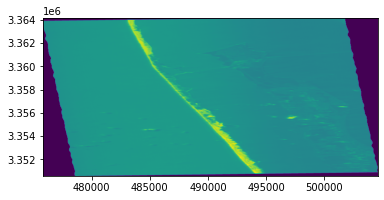

In [8]:
with rasterio.open(filepath_rad, 'r') as src:
    rplot.show(src)

The plot and the array might not be very useful right now, but at least we have validated that we can open our raster and that it contains data.

If you like viewing quick plots as a way of interacting with your data you can read more about it in the [rasterio docs](https://rasterio.readthedocs.io/en/latest/topics/plotting.html).

### Extra background - Context managers

It might be new to you that I used the syntax:
```python
with ... as src:
    src.read()
```

This syntax is called the **Context manager**.  When we read files we are opening them up, like a book, and they stay open until we tell the program to close them.  The benefit of the context manager is that it opens up a file when you use the `with` statement, runs all your lines of indented code, and the closes the file after.  This is important if you are opening up large files.  Your computer only has so much memory, so if you try to open too many 8GB files at once without closing them you can crash your program.

If you don't want to use the contect manager another way to this same task is to run:

In [9]:
src = rasterio.open(filepath_rad, 'r')
src.read(1)
print(src)
src.close()

<open DatasetReader name='../input_data/f100520t01p00r08rdn_b/f100520t01p00r08rdn_b_sc01_ort_img' mode='r'>


If you do this, though, make sure to only be working with a few files at a time or to close your files.

## 🔍 Inspecting the Metadata

When you first open a dataset it is often helpful to get your bearings by inspecting the metadata.  In rasterio we do this by inspecting the DatasetReader object (`src`) that was returned when you opened the object.

There are [lots of attributes](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#rasterio._base.DatasetBase) that you check a dataset reader for.  If you want to get an general overview I like to use `src.meta`.  To extract specific values here are some more attributes that I find useful:
* [`src.bounds`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id1) - Returns the lower left and upper right bounds of the dataset in the units of its coordinate reference system. (lower left x, lower left y, upper right x, upper right y)
* [`src.count`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id5) - The number of raster bands in the dataset
* [`src.crs`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id6) - The dataset’s coordinate reference system
* [`src.descriptions`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id7) - Descriptions for each dataset band
* [`src.dtypes`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#rasterio._base.DatasetBase.dtypes) - The data types of each band in index order
* `src.height` - The number of pixels in each column
* [`src.indexes`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id11) - The 1-based indexes of each band in the dataset
* [`src.meta`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id14) - The basic metadata of this dataset.
* `src.name` - Relative filepath of the dataset
* [`src.nodata`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id17) - The dataset’s single nodata value
* [`src.res`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id22) - Returns the (width, height) of pixels in the units of its coordinate reference system.
* [`src.transform`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id24) - The dataset’s georeferencing transformation matrix
* [`src.units`](https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html#id25) - one units string for each dataset band
* `src.width` - the number of pixels in each row

All of the parts of the raster that were addressed in the first section of this notebook  _Anatomy of a raster_ are accessible using these attributes.

### Example

In [10]:
from pprint import pprint

In [11]:
# Try substituting any of the above attributes in for this dataset
with rasterio.open(filepath_rad, 'r') as src:
    print('src.meta - ')
    pprint(src.meta)
    print('src.name - ', src.name)

src.meta - 
{'count': 224,
 'crs': CRS.from_epsg(32616),
 'driver': 'ENVI',
 'dtype': 'int16',
 'height': 1684,
 'nodata': None,
 'transform': Affine(1.047073013270987e-15, 17.1, 475785.77,
       17.1, -1.047073013270987e-15, 3350578.5),
 'width': 795}
src.name -  ../input_data/f100520t01p00r08rdn_b/f100520t01p00r08rdn_b_sc01_ort_img


In [12]:
with rasterio.open(filepath_rad, 'r') as src:
    print(src.read().shape)

(224, 1684, 795)


With the above print statement we learned from the `src.meta` information that the raster has 224 bands (`count`) it has the coordinate reference system EPSG code 32616 (`crs`), it is an ENVI filetype (`driver`), the datatype is int16 (`dtype`), it has 1684 rows or is 1684 pixels tall (`height`), there isn't a nodata value set (`nodata`), the affine tranform is (1.047073013270987e-15, 17.1, 475785.77, 17.1, -1.047073013270987e-15, 3350578.5) (`tranform`), and that the raster has 795 columns or is 795 pixels wide.  We also see the relative filepath of the raster from the `src.name` attribute.

### Bounding Boxes

A bounding box is a pretty important concept in a raster dataset.  It represents the minimum and maxiumum coordinates of the dataset.  These are often latitude and longitude lines, but the bounding box is given the units of whatever dataset the raster is using.  Since AVIRIS data uses a UTM grid (projected CRS) the units of the bounding box are meters.

<img src="../images/Bounding box.png" width="550">

In this example the outline of Italy is shown in red and the bounding box for Italy, which follows the minimum and maximum latitude and longitude lines, is shown in black.

Bounding boxes are often written as a list of coordinates in the format `[minimum_x minimum_y maximum_x maximum_y]`.  So for our Italy example the bounding box would be `[6.634, 36.62, 18.511, 47.08]`.

We access the bounds of the dataset using:

In [13]:
with rasterio.open(filepath_rad, 'r') as src:
    print(src.bounds)

BoundingBox(left=475785.77, bottom=3350578.5, right=504582.17000000004, top=3364173.0)


Notice that you can also assign the bounding box to a python variable and pull the left, right, top or bottom elements out by name.

In [14]:
with rasterio.open(filepath_rad, 'r') as src:
    bbox = src.bounds
print(bbox.left)

475785.77


If you aren't familiar with the UTM coordinate system those numbers probably don't mean a lot.  Coordinate Reference Systems are discussed in a notebook in the `Additional Notebooks` section and we will reference the bbox again there.

## 🚜 Working with the Data

While the raster file is is accessed through a unique filetype-specific library, the actual data is almost always just a common matrix datatype.  Numpy is the most common library used, but xarray is also used by some data libraries.

A reminder about matrix indexing:
* 2D matrices use row, column order
* 3D matrices use height, row, column order

### Exploratory statistics

When I open a dataset I often like to get a sense of it by just looking at looking at statistics for one of the bands.

In [15]:
# Read out a band
with rasterio.open(filepath_rad, 'r') as src:
    band1 = src.read(1)

# Print the overview statistics
print('max value: ', band1.max())
print('mean value: ', band1.mean())
print('min value: ', band1.min())

max value:  2608
mean value:  1161.7672455519205
min value:  -50


One thing to be careful of is how the nodata value can be affecting the stats.  It is good to check the nodata value assigned to the file. Do keep in mind, however, that the nodata value can sometimes be mis-labelled or often isn't labelled at all.  One way think I do if there isn't a nodata value given is check for any disproportionately common min or max values that are outside the logical values for a variable.

In [16]:
from scipy import stats

In [17]:
print(stats.mode(band1, axis=None))
print('total number of pixels: ', band1.size)

ModeResult(mode=array([-50], dtype=int16), count=array([156124]))
total number of pixels:  1338780


If you have a particular value you are suspicious of you can check the number of times it occurs with the `np.count_nonzero()` function.

In [18]:
import numpy as np

In [19]:
np.count_nonzero(band1==9999)

0

Looking at these outputs, my guess woudl be that although there is no `nodata` value set in the metadata it appears as though -50 is a nodata value in this file.  This could be confirmed by checking the AVIRIS documentation.

Recognizing that there is actually a nodata value means that some of our exploratory statistics are inaccurate.  One way to deal with this is to set all of the -50 values to nan.

In [20]:
# Convert the matrix to be a float type
band1=band1.astype('float')
band1[band1==-50] = np.nan

We can then re-run our statistics to get our real minimum and mean values.

In [21]:
# Print the overview statistics
print('max value: ', band1.max())
print('mean value: ', band1.mean())
print('min value: ', band1.min())

max value:  nan
mean value:  nan
min value:  nan


😯😯😯

Once your array has nans in it you have to use different numpy-specific functions to run your statistics.

In [22]:
print('max value: ', np.nanmax(band1))
print('mean value: ', np.nanmean(band1))
print('min value: ', np.nanmin(band1))

max value:  2608.0
mean value:  1321.7342600045997
min value:  1081.0


Another way to deal with nodata is to used masked arrays which are discused more in the notebook "Nodata & Masked Arrays.ipynb".

### Matrix Operations

Once you have your data in matrix form you can operate on it like you would with any matrix.

One way of interacting is to loop through the entire matrix by row, by column, and by band.  While this is one way to do it it can be quite slow.  When you can it is best to use built in matrix operations to work with the numpy matrices.  These operations have been built with optimization in mind.

In [23]:
with rasterio.open(filepath_rad, 'r') as src:
    red = src.read(50)
    blue = src.read(20)
    green = src.read(5)

Adding and subtracting two matrices

In [24]:
red + green

array([[-100, -100, -100, ..., -100, -100, -100],
       [-100, -100, -100, ..., -100, -100, -100],
       [-100, -100, -100, ..., -100, -100, -100],
       ...,
       [-100, -100, -100, ..., -100, -100, -100],
       [-100, -100, -100, ..., -100, -100, -100],
       [-100, -100, -100, ..., -100, -100, -100]], dtype=int16)

In [25]:
blue - red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

Multiplying or dividing a matrix by a constant

In [26]:
red*5

array([[-250, -250, -250, ..., -250, -250, -250],
       [-250, -250, -250, ..., -250, -250, -250],
       [-250, -250, -250, ..., -250, -250, -250],
       ...,
       [-250, -250, -250, ..., -250, -250, -250],
       [-250, -250, -250, ..., -250, -250, -250],
       [-250, -250, -250, ..., -250, -250, -250]], dtype=int16)

In [27]:
green/7

array([[-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       ...,
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714],
       [-7.14285714, -7.14285714, -7.14285714, ..., -7.14285714,
        -7.14285714, -7.14285714]])

Some other built in operations

In [28]:
# We have to take the absolute value of red because the nodata values are negative and that throws an error
np.sqrt(abs(red))

array([[7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       ...,
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068],
       [7.071068, 7.071068, 7.071068, ..., 7.071068, 7.071068, 7.071068]],
      dtype=float32)

In [29]:
np.power(red, 5)

array([[-24352, -24352, -24352, ..., -24352, -24352, -24352],
       [-24352, -24352, -24352, ..., -24352, -24352, -24352],
       [-24352, -24352, -24352, ..., -24352, -24352, -24352],
       ...,
       [-24352, -24352, -24352, ..., -24352, -24352, -24352],
       [-24352, -24352, -24352, ..., -24352, -24352, -24352],
       [-24352, -24352, -24352, ..., -24352, -24352, -24352]], dtype=int16)

There are lots more built in functions.  [This table](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html#table_unary_ufuncs) has a nice list.

### Datacubes / 3D matrices

If you want to work with multiple bands in your dataset it can be helpful to bundle them together into a 3d matrix.

If you want all of the bands together you can read them out using `src.read()` without a band index.  But if you only want specific bands you will have to bundle them together yourself.  To do this you will construct those bands into a "datacube" or a 3d matrix of data.

In [30]:
with rasterio.open(filepath_rad, 'r') as src:
    red = src.read(50)
    blue = src.read(20)
    green = src.read(5)

Looking at the shape of the bands we notice that they are two dimensionsal.

In [31]:
print(red.shape)

(1684, 795)


In order to stack the bands into a 3d matrix we need to add a third dimension to each of the bands.

In [32]:
# change the first layer from a 2d matrix to a 3d matrix
print('band starting shape ', red.shape)
red = np.expand_dims(red, axis=0)
blue = np.expand_dims(blue, axis=0)
green = np.expand_dims(green, axis=0)
print('band with extra dimension ', red.shape)

band starting shape  (1684, 795)
band with extra dimension  (1, 1684, 795)


To actually stack the bands together we use the `concatentate` command.

In [33]:
# Layer these three bands on top of one another with the `concatenate` command
rgb_cube = np.concatenate((red, blue, green), axis=0)
print('cube shape ',rgb_cube.shape)

cube shape  (3, 1684, 795)


Now you can use the matrix operations from above on multiple bands at once.

In [34]:
rgb_cube ** 2

array([[[2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        ...,
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500]],

       [[2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        ...,
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500]],

       [[2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        ...,
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500],
        [2500, 2500, 2500, ..., 2500, 2500, 2500]]], dtype=int16)

**Looping through bands**

If you have more than a a few layers to stack running the `np.expand_dims()` and `np.concatenate()` for every band can get unwieldy.  To make this process more automated you can define a `list` object with all the bands you want in it and then loop through that.

In [35]:
bands_i_want = [1,4, 5, 6, 10, 11, 20, 30, 42]
with rasterio.open(filepath_rad, 'r') as src:
    # Start with an empty cube that is the same shape as your raster
    cube = np.full([0, src.height, src.width], np.nan)
    print('starting cube shape ', cube.shape)
    for i in bands_i_want:
        # Read the layer from the Dataset Reader object
        new_layer = src.read(i)
        # Expand the number of dimensions on that layer
        new_layer = np.expand_dims(new_layer, axis=0)
        # Stack the newest layer on the existing cube
        cube = np.concatenate((cube, new_layer), axis=0)
        print('cube with new layer shape ', cube.shape)
print('final cube shape ', cube.shape)

starting cube shape  (0, 1684, 795)
cube with new layer shape  (1, 1684, 795)
cube with new layer shape  (2, 1684, 795)
cube with new layer shape  (3, 1684, 795)
cube with new layer shape  (4, 1684, 795)
cube with new layer shape  (5, 1684, 795)
cube with new layer shape  (6, 1684, 795)
cube with new layer shape  (7, 1684, 795)
cube with new layer shape  (8, 1684, 795)
cube with new layer shape  (9, 1684, 795)
final cube shape  (9, 1684, 795)


## 💾 Saving a file

At a certain point you may want to do it.  Let's start by getting some data to save

In [36]:
# Get our data setup
with rasterio.open(filepath_rad, 'r') as src:
    red_src = src.read(50)
    blue_src = src.read(20)
    green_src = src.read(10)
    meta = src.meta.copy()

It is best practice to persist or update as much of the metadata from your old raster as you can.  As you may have experienced working with data, complete and accurate metadata can make someone else's life (and maybe even your own) much easier down the road.  Make sure you look at it, though, to make sure all the information still applies to your new raster.

Count has changed, since we are only saving 3 of the 224 total bands, so we need to upadate the `count` value.  I am also going to set -50 as the nodata value.

In [37]:
meta.update(count=3, nodata=-50)

Another thing you could do is add tags to your bands so that you remember what band number you used.  You do this when you write out the data.

In [38]:
# Make the output directory if it does not exist yet
import os
if not os.path.exists('../output_data'):
    os.makedirs('../output_data')

In [39]:
with rasterio.open(
    '../output_data/rgb',
    'w',
    **meta
) as dst:
    # Write data matrices
    dst.write(red_src, 1)
    dst.write(green_src, 2)
    dst.write(blue_src, 3)
    # Add band tags
    dst.update_tags(1, src_band=50)
    dst.update_tags(2, src_band=10)
    dst.update_tags(3, src_band=20)

If we want to confirm that our dataset saved properly we can open it back up and look at what we saved.

In [40]:
with rasterio.open('../output_data/rgb', 'r') as src:
    red_dst = src.read(1)
    green_dst = src.read(2)
    blue_dst = src.read(3)

In [41]:
print('Source stats: ')
print('red: ', red_src.mean(), red_src.max())
print('green: ', green_src.mean(), green_src.max())
print('blue: ', blue_src.mean(), blue_src.max())
print('Destination stats: ')
print('red: ', red_dst.mean(), red_dst.max())
print('green: ', green_dst.mean(), green_dst.max())
print('blue: ', blue_dst.mean(), blue_dst.max())

Source stats: 
red:  815.4487122604162 5211
green:  2647.5371188694185 9894
blue:  2020.4028817281405 10464
Destination stats: 
red:  815.4487122604162 5211
green:  2647.5371188694185 9894
blue:  2020.4028817281405 10464


Our values line up!  And the new values came from the raster we made ourselves.  😄